In [8]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
iris = datasets.load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [10]:
# We go throw all the training sample before we adjuust the weight (BGD) and this is too bad when we have big sample and big features

def BGD(x_train,y_train,epochs,learning_rate=0.01):#epochs is to go throw all the training samples and learning rate is for controlling how fast the model want to learn
  
    w = np.zeros(x_train.shape[1])  # weights for each feature and to start all the weights with zero because if we used ones the model will start with strong assumtion and there will be a bias so we use zeros not ones or other valuse
    b = 0 #insaialize with zero to start with no assumtion to avoid bias
    loss_history = []
    
    for epoch in range(epochs):
        y_pred = np.dot(x_train, w) + b #predictions
        error = y_pred - y_train
        
        gradient_w = (1/len(x_train)) * np.dot(x_train.T, error) #The gradient tells us the direction and magnitude of the steepest ascent of the loss function. To minimize the loss, we move in the opposite direction of the gradient.The gradient tells us the direction and magnitude of the steepest ascent of the loss function. To minimize the loss, we move in the opposite direction of the gradient.
        gradient_b = (1/len(x_train)) * np.sum(error) #The bias term allows the model to shift the predictions up or down. The gradient for the bias tells us how much to adjust it to reduce the loss.The bias term allows the model to shift the predictions up or down. The gradient for the bias tells us how much to adjust it to reduce the loss.The bias term allows the model to shift the predictions up or down. The gradient for the bias tells us how much to adjust it to reduce the loss.
        
        #smaller learning rate means smaller steps, while a larger learning rate means larger steps.
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b 
        
        loss = np.mean((y_pred - y_train) ** 2)
        loss_history.append(loss)
        
        # Print the loss every 200 epochs
        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return w, b, loss_history

In [4]:
# We adjust the weight after every training sample i do (SGD) and this is good for big samples and if we want a small competition (by random picking)
def SGD(x_train, y_train, epochs, learning_rate=0.01):
    w = np.zeros(x_train.shape[1])
    b = 0 
    loss_history = [] 
    
    for epoch in range(epochs):
        # Shuffle the training data to randomize the order of samples
        indices = np.arange(len(x_train))
        np.random.shuffle(indices)
        x_train_shuffled = x_train[indices]
        y_train_shuffled = y_train[indices]
        
        for i in range(len(x_train)):
            # Select one training sample
            x_i = x_train_shuffled[i]
            y_i = y_train_shuffled[i]
            
            y_pred = np.dot(x_i, w) + b
            error = y_pred - y_i
            
            gradient_w = x_i * error
            gradient_b = error
            
            w -= learning_rate * gradient_w
            b -= learning_rate * gradient_b
        
        # Compute the loss for the entire training set (optional, for tracking)
        y_pred_all = np.dot(x_train, w) + b
        loss = np.mean((y_pred_all - y_train) ** 2)
        loss_history.append(loss)
        
        # Print the loss every 50 epochs
        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return w, b, loss_history

In [11]:
# We can use a batch of randomly picked samples and calculate the error for them (MBGD)
def MBGD(x_train, y_train, epochs, learning_rate=0.01, batch_size=32):
    w = np.zeros(x_train.shape[1]) 
    b = 0  
    loss_history = []  
    
    for epoch in range(epochs):
        indices = np.arange(len(x_train))
        np.random.shuffle(indices)
        x_train_shuffled = x_train[indices]
        y_train_shuffled = y_train[indices]
        
        for i in range(0, len(x_train), batch_size):
            x_batch = x_train_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]
            
            y_pred = np.dot(x_batch, w) + b
            error = y_pred - y_batch
            
            gradient_w = (1 / len(x_batch)) * np.dot(x_batch.T, error)
            gradient_b = (1 / len(x_batch)) * np.sum(error)
            
            w -= learning_rate * gradient_w
            b -= learning_rate * gradient_b
            
        y_pred_all = np.dot(x_train, w) + b
        loss = np.mean((y_pred_all - y_train) ** 2)
        loss_history.append(loss)
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return w, b, loss_history

In [ ]:
epochs = 1000
learning_rate = 0.01
w_bgd, b_bgd, loss_bgd = BGD(X_train, y_train, epochs, learning_rate)
y_pred_bgd = np.dot(X_test, w_bgd) + b_bgd
mse_bgd = mean_squared_error(y_test, y_pred_bgd)
print(f"BGD MSE: {mse_bgd:.10f}")

w_sgd, b_sgd, loss_sgd = SGD(X_train, y_train, epochs, learning_rate)
y_pred_sgd = np.dot(X_test, w_sgd) + b_sgd
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print(f"SGD MSE: {mse_sgd:.10f}")

batch_size = 32
w_mbgd, b_mbgd, loss_mbgd = MBGD(X_train, y_train, epochs, learning_rate, batch_size)
y_pred_mbgd = np.dot(X_test, w_mbgd) + b_mbgd
mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)
print(f"MBGD MSE: {mse_mbgd:.10f}")

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Scikit-Learn LinearRegression MSE: {mse_lr:.10f}")

Epoch 0, Loss: 1.6
Epoch 50, Loss: 0.10127721482455103
Epoch 100, Loss: 0.06404435739285597
Epoch 150, Loss: 0.058791878104159194
Epoch 200, Loss: 0.057651564737934834
Epoch 250, Loss: 0.05706914789271763
Epoch 300, Loss: 0.05658912443632279
Epoch 350, Loss: 0.05615109082252091
Epoch 400, Loss: 0.05574517438542158
Epoch 450, Loss: 0.055368107937866076
Epoch 500, Loss: 0.05501761924313227
Epoch 550, Loss: 0.054691704286691796
Epoch 600, Loss: 0.05438852383559721
Epoch 650, Loss: 0.054106380259194294
Epoch 700, Loss: 0.053843705344548055
Epoch 750, Loss: 0.05359905022052834
Epoch 800, Loss: 0.05337107620387157
Epoch 850, Loss: 0.05315854636589916
Epoch 900, Loss: 0.05296031774798893
Epoch 950, Loss: 0.0527753341739342
BGD MSE: 0.0446129655
Epoch 0, Loss: 0.09120258507389499
Epoch 50, Loss: 0.05314256184371942
Epoch 100, Loss: 0.050760901309160125
Epoch 150, Loss: 0.10455342163900978
Epoch 200, Loss: 0.07922866061595692
Epoch 250, Loss: 0.12530210647537526
Epoch 300, Loss: 0.1189435272810

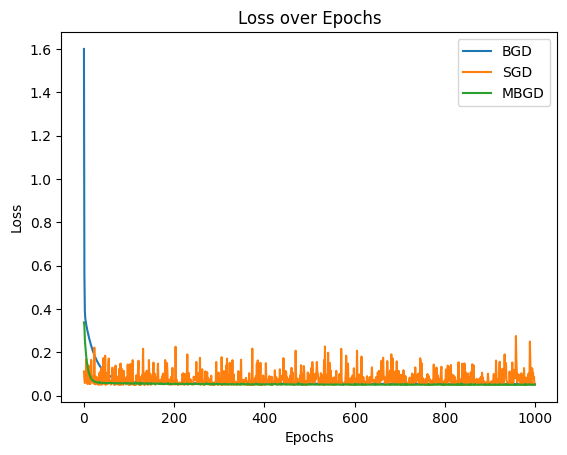

In [7]:
plt.plot(loss_bgd, label='BGD')
plt.plot(loss_sgd, label='SGD')
plt.plot(loss_mbgd, label='MBGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()